<a href="https://colab.research.google.com/github/CopotronicRifat/CS-5783-Machine-Learning-Assignments/blob/main/ML_ASSIGNMENT_2_PROBLEM_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Drive mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
# Load the data from drive

x_train = np.loadtxt('/content/drive/MyDrive/X_train.csv')
y_train = np.loadtxt('/content/drive/MyDrive/Y_train.csv')
x_test = np.loadtxt('/content/drive/MyDrive/X_test.csv')
y_test = np.loadtxt('/content/drive/MyDrive/Y_test.csv')

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 2)
(100,)
(50, 2)
(50,)


In [24]:
y_train = y_train.reshape(100,1)
y_test = y_test.reshape(50,1)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 2)
(100, 1)
(50, 2)
(50, 1)


In [26]:
# Sigmoid Activation Function

def sigmoid (z):
    return 1/(1+np.exp(-z))

In [42]:
w1 = np.random.rand(100,2)  
b1= np.random.rand(100,1)   

w2 = np.random.rand(1,100)  
b2= np.random.rand(1,1) 

In [45]:
# Backpropagation with MSE

learning_rate = 0.001

mse2 = []
w1_list = []
w2_list = []
b1_list = []
b2_list = []
t11_list = []


for i in range (100):
    mse1 = []
    t1_list = []
    t2_list = []

    
    for j in range (100):
        
        # Forward Pass

        z1 = np.dot(w1,x_train[j].reshape(2,1))+b1  
        a1 = sigmoid(z1)
        z2 = np.dot(w2,a1)+b2
        a2 = z2

        dz2 = a2-y_train[j].reshape(1,1)
        dw2 = np.dot(dz2,a1.T)
        db2 = dz2

        dz1 = np.dot(w2.T,a2-y_train[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
        dw1 = np.dot(dz1,x_train[j].reshape(2,1).T)
        db1 = dz1

        w1 = w1-learning_rate*dw1
        b1 = b1-learning_rate*np.mean(db1)
        w2 = w2-learning_rate*dw2
        b2 = b2-learning_rate*np.mean(db2)
        
        MSE = ((y_train[j] - a2)**2)
        mse1.append(MSE)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)

    a = sum(mse1)/100
    mse2.append(a)
    b=(len(t1_list))/100
    t11_list.append(b)

**Problem 2.1**

As it is a regression problem and we only have one neuron in the output layer, we won't need any activation function for the output layer.

**Problem 2.2**

There will be only one output layer as it is a regression problem. We do not need any class prediction, rather we need continuous values.

In [46]:
import math

**Problem 2.3.a**

MSE Loss and Accuracy on Train Data

In [47]:
print("Average MSE loss on Train data: ", sum(mse2)/2*100)
print("Average Accuracy on Train data: ", math.sqrt(sum(mse2)/100))

Avrg MSE loss on Train data:  [[337420.44427295]]
Avrg Accuracy on Train data:  8.21486998403447


In [48]:
mse4 = []
t33_list = []

for i in range (len (w1_list)):
    mse3 = []
    t3_list = []
    t4_list = []
    for j in range (50):
        z1 = np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
        a1 = sigmoid(z1)
        z2 = np.dot(w2_list[i],a1)+b2_list[i]
        a2 = z2 

        a_round = np.round(a2,0)
        y_train[j] = np.round(y_train[j],0)

        MSE = ((y_test[j]- a2)**2)
        mse3.append(MSE)

    a = sum(mse3)/50
    mse4.append(a)
    b = (len(t3_list))/50
    t33_list.append(b)



**Problem 2.3.b**

MSE Loss and Accuracy on Test data

In [49]:
print("Avrg MSE Loss on Test data: ",sum(mse4)/2*50)
print("Avrg Accuracy on Test data: ", math.sqrt(sum(mse4)/50))

Avrg MSE Loss on Test data:  [[267044.46159492]]
Avrg Accuracy on Test data:  14.616277545118454


**Problem 2.4**

Plotting the Loss Function

Plotting the Accuracy is NOT relevent here as it is a regression problem that we are dealing with, NOT a classification problem.

Accuracy is only relevent in classification task.

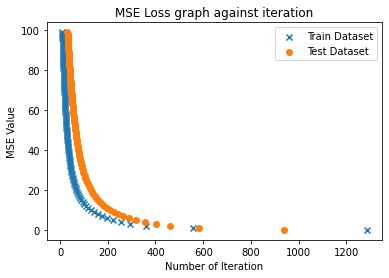

In [50]:
iterlist = []
for i in range(100):
    iterlist.append(i)
import matplotlib.pyplot as plt
plt.scatter(mse2, iterlist, marker = "x", label = "Train Dataset")
plt.scatter(mse4, iterlist, marker = "o", label = "Test Dataset")

plt.title('MSE Loss graph against iteration')
plt.xlabel('Number of Iteration')
plt.ylabel('MSE Value')

plt.legend()
plt.show()

**Problem 2.5**

Variation of Learning Rate between 0.001 and 1.0

N.B: Please note that, the values are so small to distinguish in the plots. 

In [55]:
learningrates_list = [0.001,0.01,0.1,1.0]

mse2 = []
mse4 = [[]]
w1_list = []
w2_list = []
b1_list = []
b2_list = []
t11_list = []
rmse_train = []
rmse_test = []
rmse_train2 = []
rmse_test2 = []

for k in range(len(learningrates_list)):
  learning_rate = learningrates_list[k]
  for i in range (100):
    mse_list1 = []
    t1_list = []
    t2_list = []
    
    for j in range (100):
        # Forward Pass
        z1 = np.dot(w1,x_train[j].reshape(2,1))+b1
        a1 = sigmoid(z1)
        z2 = np.dot(w2,a1)+b2
        a2 = z2
     
        dz2 = a2-y_train[j].reshape(1,1)
        dw2 = np.dot(dz2,a1.T)
        db2 = dz2
        dz1 = np.dot(w2.T,a2-y_train[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
        dw1 = np.dot(dz1,x_train[j].reshape(2,1).T)
        db1 = dz1

        w1 = w1-learning_rate*dw1
        b1 = b1-learning_rate*np.mean(db1)
        w2 = w2-learning_rate*dw2
        b2 = b2-learning_rate*np.mean(db2)
        
        
        MSE = ((y_train[j] - a2)**2)
        mse1.append(MSE)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)

    a = sum(mse_list1)/100
    mse2.append(a)
    b = (len(t1_list))/100
    t11_list.append(b)




  mse4 = []
  t33_list = []

  for i in range (len (w1_list)):
      t3_list = []
      t4_list = []
      mse3 = []
      for j in range (50):
          z1 = np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
          a1 = sigmoid(z1)
          z2 = np.dot(w2_list[i],a1)+b2_list[i]
          a2 = z2
          a_round = np.round(a2,0)
          y_train[j] = np.round(y_train[j],0)

          mse = ((y_test[j]- a2)**2)
          mse3.append(mse)


      a = sum(mse3)/50
      mse4.append(a)
      b = (len(t3_list))/50
      t33_list.append(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


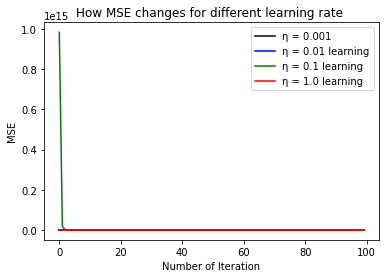

In [60]:
epoch = 100
num_epoch = np.arange(epoch)

plt.plot(num_epoch, np.array(mse4[0:100]).reshape(epoch,1), color = 'black')
plt.plot(num_epoch, np.array(mse4[100:200]).reshape(epoch,1), color = 'blue')
plt.plot(num_epoch, np.array(mse4[200:300]).reshape(epoch,1), color = 'green')
plt.plot(num_epoch, np.array(mse4[300:400]).reshape(epoch,1), color = 'red')

plt.legend(("η = 0.001", "η = 0.01 learning", "η = 0.1 learning", "η = 1.0 learning"))
plt.ylabel('MSE')
plt.xlabel('Number of Iteration')
plt.title('How MSE changes for different learning rate ')
plt.show()

Problem 2.6.a

It does update the values as it is directly related to the network structure.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


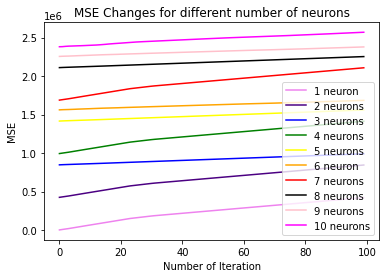

In [62]:
mse1 = []
mse2 = []
mse3 = []
mse4 = []
w1_list = []
w2_list = []
b1_list = []
b2_list = []
t11_list = []


for k in range(1,11):
  w1=np.random.rand(k,2)
  b1=np.random.rand(k,1)
  w2=np.random.rand(1,k)
  b2=np.random.rand(1,1)
  learning_rate = 0.1
  
  for i in range (100):
      
      for j in range (100):
          # Forward Pass
          z1 = np.dot(w1,x_train[j].reshape(2,1))+b1
          a1 = sigmoid(z1)
          z2 = np.dot(w2,a1)+b2
          a2 = z2
 
          dz2 = a2-y_train[j].reshape(1,1)
          dw2 = np.dot(dz2,a1.T)
          db2 = dz2
          dz1 = np.dot(w2.T,a2-y_train[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
          dw1 = np.dot(dz1,x_train[j].reshape(2,1).T)
          db1 = dz1

          w1=w1-learning_rate*dw1
          b1=b1-learning_rate*np.mean(db1)
          w2=w2-learning_rate*dw2
          b2=b2-learning_rate*np.mean(db2)

        
          mse = ((y_train[j] - a2)**2)
          mse_list1.append(mse)

      w1_list.append(w1)
      w2_list.append(w2)
      b1_list.append(b1)
      b2_list.append(b2)

      a=sum(mse_list1)/100
      mse2.append(a)

  
  for i in range (len (w1_list)):
      t3_list =[]
      t4_list = []
      for j in range (50):
          z1 = np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
          a1 = sigmoid(z1)
          z2 = np.dot(w2_list[i],a1)+b2_list[i]
          a2 = z2

          mse = ((y_test[j]- a2)**2)
          mse3.append(mse)

      a = sum(mse3)/50
      mse4.append(a)

epoch=100
num_epoch = np.arange(epoch)
plt.plot(num_epoch, np.array(mse4[0:100]).reshape(epoch,1), color = 'violet')
plt.plot(num_epoch, np.array(mse4[100:200]).reshape(epoch,1), color = 'indigo')
plt.plot(num_epoch, np.array(mse4[200:300]).reshape(epoch,1), color = 'blue')
plt.plot(num_epoch, np.array(mse4[300:400]).reshape(epoch,1), color = 'green')
plt.plot(num_epoch, np.array(mse4[400:500]).reshape(epoch,1), color = 'yellow')
plt.plot(num_epoch, np.array(mse4[500:600]).reshape(epoch,1), color = 'orange')
plt.plot(num_epoch, np.array(mse4[600:700]).reshape(epoch,1), color = 'red')
plt.plot(num_epoch, np.array(mse4[700:800]).reshape(epoch,1), color = 'black')
plt.plot(num_epoch, np.array(mse4[800:900]).reshape(epoch,1), color = 'pink')
plt.plot(num_epoch, np.array(mse4[900:1000]).reshape(epoch,1), color = 'magenta')

plt.legend(("1 neuron", "2 neurons", "3 neurons","4 neurons", "5 neurons", "6 neuron", "7 neurons", "8 neurons","9 neurons", "10 neurons"))
plt.ylabel('MSE')
plt.xlabel('Number of Iteration')
plt.title('MSE Changes for different number of neurons')
plt.show()

**Problem 2.6.b**

As it is a regression problem with continuous values in y_train.csv and y_test.csv, there should NOT be any labels and any predicted labels. The predictions are all continueous values.

Hence, there are no labels.

**Problem 2.7.a**

We need to change the update rule based on the activation function. Because the update derivatives are associated withthe nature of the activation function. 

In [63]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [68]:
def tanh(x):
	return np.tanh(x)

In [74]:
learning_rate = 0.001

In [75]:
mse2 = []
w1_list = []
w2_list = []
b1_list = []
b2_list = []


for i in range (100):
    mse1 = []
    t1_list = []
    t2_list = []
    a_list = []
    
    for j in range (100):

        z1 = np.dot(w1,x_train[j].reshape(2,1))+b1
        a1 = tanh(z1)
        z2 = np.dot(w2,a1)+b2
        a2 = z2
       
        dz2 = a2.reshape(1,1)-y_train[j]
        dw2 = (2)*np.dot(dz2,a1.T)
        db2 = (2)*dz2
        dz1 = np.dot(w2.T,a2-y_train[j].reshape(1,1))*(1-tanh(z1)**2)
        dw1 = 2*np.dot(dz1,x_train[j].reshape(2,1).T)
        db1 = 2*dz1

        w1 = w1-learning_rate*dw1
        b1 = b1-learning_rate*db1
        w2 = w2-learning_rate*dw2
        b2 = b2-learning_rate*db2
           
        MSE = ((y_train[j] - a2)**2)
        mse1.append(MSE)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)
    a_list.append(a2)
    a=sum(mse_list1)/100
    mse2.append(a)


print("Average MSE on Train data: ", sum(mse2)/100)

mse4 = []
t33_list = []

for i in range (len (w1_list)):
    t3_list = []
    t4_list = []
    mse_list3 = []
    for j in range (50):
        z1 = np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
        a1 = tanh(z1)
        z2 = np.dot(w2_list[i],a1)+b2_list[i]
        a2 = z2
        y_train[j] = np.round(y_train[j],0)

        MSE = ((y_test[j]- a2)**2)
        mse_list3.append(MSE)

    a = sum(mse3)/50
    mse4.append(a)

print("Average MSE on Test data: ",sum(mse4)/100)

Average MSE on Train data:  [[1288726.89021345]]
Average MSE on Test data:  [[10495376.85024131]]


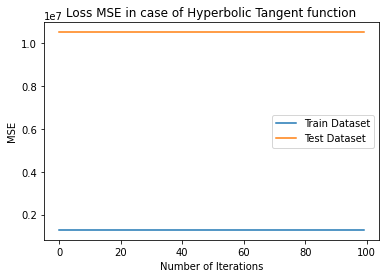

In [79]:
Line1=[k for i in mse2 for j in i for k in j]
plt.plot(np.arange(100),Line1)

Line2=[k for i in mse4 for j in i for k in j]
plt.plot(np.arange(100),Line2)

plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.legend(('Train Dataset','Test Dataset'))
plt.title('Loss MSE in case of Hyperbolic Tangent function')
plt.show()

In [77]:
mse2 = []
w1_list = []
w2_list = []
b1_list = []
b2_list = []


for i in range (100):
    mse1 = []
    t1_list = []
    t2_list = []
    a_list = []
    
    for j in range (100):

        z1 = np.dot(w1,x_train[j].reshape(2,1))+b1
        a1 = ReLU(z1)
        z2 = np.dot(w2,a1)+b2
        a2 = z2
       
        dz2 = a2.reshape(1,1)-y_train[j]
        dw2 = 2*np.dot(dz2,a1.T)
        db2 = 2*dz2
        dz1 = np.dot(w2.T,a2-y_train[j].reshape(1,1))*(1-ReLU(z1)**2)
        dw1 = 2*np.dot(dz1,x_train[j].reshape(2,1).T)
        db1 = 2*dz1

        w1 = w1-learning_rate*dw1
        b1 = b1-learning_rate*db1
        w2 = w2-learning_rate*dw2
        b2 = b2-learning_rate*db2
           
        MSE = ((y_train[j] - a2)**2)
        mse1.append(MSE)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)
    a_list.append(a2)
    a=sum(mse_list1)/100
    mse2.append(a)


print("Average MSE on Train data: ", sum(mse2)/100)

mse4 = []
t33_list = []

for i in range (len (w1_list)):
    t3_list = []
    t4_list = []
    mse_list3 = []
    for j in range (50):
        z1 = np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
        a1 = ReLU(z1)
        z2 = np.dot(w2_list[i],a1)+b2_list[i]
        a2 = z2
        y_train[j] = np.round(y_train[j],0)

        MSE = ((y_test[j]- a2)**2)
        mse_list3.append(MSE)

    a = sum(mse3)/50
    mse4.append(a)

print("Average MSE on Test data: ",sum(mse4)/100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


Average MSE on Train data:  [[1288726.89021345]]
Average MSE on Test data:  [[10495376.85024131]]


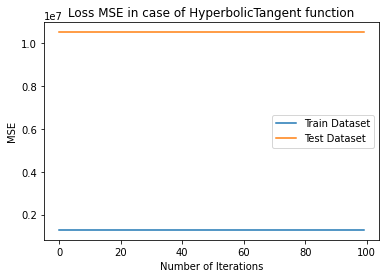

In [78]:
Line1 = [k for i in mse2 for j in i for k in j]
plt.plot(np.arange(100),Line1)

Line2 = [k for i in mse4 for j in i for k in j]
plt.plot(np.arange(100),Line2)

plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.legend(('Train Dataset','Test Dataset'))
plt.title('Loss MSE in case of ReLU function')
plt.show()

**Problem 2.7.b**

We need to change the update rules and the derivatives based on the activation function.

**Problem 2.7.c**

As the linear function is NOT derivable, we won't get any result for Linear Function.

Final Loss is determined in the above code segments. 

But, again, as it is a regression problem with continuous values in y_train.csv and y_test.csv, there should NOT be any labels and any predicted labels. The predictions are all continueous values. 

Hence there are no labels.
